# Detects Facial Expession and Outputs emoji with respect to that

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential,Model,model_from_json
from keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization

from sklearn.metrics import classification_report, confusion_matrix


#VGG!^
from keras.applications.vgg16 import VGG16

from PIL import Image
import glob
import keras
from keras.applications import vgg16
from keras.layers import Input
import matplotlib.pyplot as plt
print('imported')

Using TensorFlow backend.


imported


# Image Preprocessing : Test 1 : with 500 Images as "Disgust" Class has only 500 images

In [2]:


labels = []

images= []
i=0
print("strt")

images_val = []
labels_val = []

file_paths = glob.glob("C:\\MyLearnings\\DeepLearning\\Object Detection\\Projects\\FacialEmotionDetection\\Datasets\\fer2013_images\\fer_images_classes\\Training\\Angry\\*.jpg")
for image in file_paths:
  if i<4458:
    im = Image.open(image)
    images.append(np.asarray(im)) #.transpose(1, 0, 2))
    labels.append(0)
    i+=1
  else:
    im = Image.open(image)
    images_val.append(np.asarray(im)) #.transpose(1, 0, 2))
    labels_val.append(0)    

print("Enter")
print(np.array(images).shape)
print(np.array(images_val).shape)
i =0
file_paths = glob.glob("C:\\MyLearnings\\DeepLearning\\Object Detection\\Projects\\FacialEmotionDetection\\Datasets\\fer2013_images\\fer_images_classes\\Training\\Disgust\\*.jpg")
for image in file_paths:
  if i<7998:
    im = Image.open(image)
    images.append(np.asarray(im)) #.transpose(1, 0, 2))
    labels.append(1)
    i+=1
  else:
    im = Image.open(image)
    images_val.append(np.asarray(im)) #.transpose(1, 0, 2))
    labels_val.append(1)    
    
print("Enter")
print(np.array(images).shape)
print(np.array(images_val).shape)

i=0
file_paths = glob.glob("C:\\MyLearnings\\DeepLearning\\Object Detection\\Projects\\FacialEmotionDetection\\Datasets\\fer2013_images\\fer_images_classes\\Training\\Fear\\*.jpg")
for image in file_paths:
  if i<4608:
    im = Image.open(image)
    images.append(np.asarray(im)) #.transpose(1, 0, 2))
    labels.append(2)
    i+=1
  else:
    im = Image.open(image)
    images_val.append(np.asarray(im)) #.transpose(1, 0, 2))
    labels_val.append(2)    

print("Enter")
print(np.array(images).shape)
print(np.array(images_val).shape)

i=0
file_paths = glob.glob("C:\\MyLearnings\\DeepLearning\\Object Detection\\Projects\\FacialEmotionDetection\\Datasets\\fer2013_images\\fer_images_classes\\Training\\Happy\\*.jpg")
for image in file_paths:
  if i<8090:
    im = Image.open(image)
    images.append(np.asarray(im)) #.transpose(1, 0, 2))
    labels.append(3)
    i+=1
  else:
    im = Image.open(image)
    images_val.append(np.asarray(im)) #.transpose(1, 0, 2))
    labels_val.append(3)    

print("Enter")
print(np.array(images).shape)
print(np.array(images_val).shape)

i=0
file_paths = glob.glob("C:\\MyLearnings\\DeepLearning\\Object Detection\\Projects\\FacialEmotionDetection\\Datasets\\fer2013_images\\fer_images_classes\\Training\\Neutral\\*.jpg")
for image in file_paths:
  if i<5578:
    im = Image.open(image)
    images.append(np.asarray(im)) #.transpose(1, 0, 2))
    labels.append(4)
    i+=1
  else:
    im = Image.open(image)
    images_val.append(np.asarray(im)) #.transpose(1, 0, 2))
    labels_val.append(4)    

print("Enter")
print(np.array(images).shape)
print(np.array(images_val).shape)

i=0

file_paths = glob.glob("C:\\MyLearnings\\DeepLearning\\Object Detection\\Projects\\FacialEmotionDetection\\Datasets\\fer2013_images\\fer_images_classes\\Training\\Sad\\*.jpg")
for image in file_paths:
  if i<5469:
    im = Image.open(image)
    images.append(np.asarray(im)) #.transpose(1, 0, 2))
    labels.append(5)
    i+=1
  else:
    im = Image.open(image)
    images_val.append(np.asarray(im)) #.transpose(1, 0, 2))
    labels_val.append(5)    

print("Enter")
print(np.array(images).shape)
print(np.array(images_val).shape)
i=0

file_paths = glob.glob("C:\\MyLearnings\\DeepLearning\\Object Detection\\Projects\\FacialEmotionDetection\\Datasets\\fer2013_images\\fer_images_classes\\Training\\Surprise\\*.jpg")
for image in file_paths:
  if i<3601:
    im = Image.open(image)
    images.append(np.asarray(im)) #.transpose(1, 0, 2))
    labels.append(6)
    i+=1
  else:
    im = Image.open(image)
    images_val.append(np.asarray(im)) #.transpose(1, 0, 2))
    labels_val.append(6)    


#print(*labels)
print("Enter")
print(np.array(images).shape)
print(np.array(images_val).shape)

images = np.array(images)
#images = images/255.0

images_val = np.array(images_val)
#images_val = images_val/255.0

#one hot encoding model = Sequential()


strt
Enter
(4458, 48, 48)
(495, 48, 48)
Enter
(12456, 48, 48)
(1384, 48, 48)
Enter
(17064, 48, 48)
(1897, 48, 48)
Enter
(25154, 48, 48)
(2796, 48, 48)
Enter
(30732, 48, 48)
(3416, 48, 48)
Enter
(36201, 48, 48)
(4024, 48, 48)
Enter
(39802, 48, 48)
(4425, 48, 48)


In [3]:
images = images.reshape(39802,48,48,1)
images_val = images_val.reshape(4425,48,48,1)


In [4]:
# One Hot Encodinhg 
from sklearn.preprocessing import LabelBinarizer
le = LabelBinarizer()
#labels = np.array(labels)
#labels = labels.reshape(-1,1)
le.fit(labels)
labels = le.transform(labels)
print(*labels)

#labels = labels.reshape(-1,1)
le.fit(labels_val)
labels_val = le.transform(labels_val)
print(*labels_val)





[1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0 0 0 0] [1 0 0 0

In [5]:
print(images.shape)
print(images_val.shape)

print(labels.shape)
print(labels_val.shape)

(39802, 48, 48, 1)
(4425, 48, 48, 1)
(39802, 7)
(4425, 7)


# Tuned Baseline

In [6]:

model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))


model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))


model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))


model.add(Conv2D(512,(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(7, activation='softmax'))
model.summary()


model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 23, 23, 128)       73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 23, 23, 128)      

In [7]:
history = model.fit(images,labels, epochs = 50,batch_size = 64,validation_data = (images_val,labels_val),shuffle = True)

Train on 39802 samples, validate on 4425 samples
Epoch 1/50
39802/39802 [==============================] - 315s 8ms/step - loss: 2.0364 - accuracy: 0.2205 - val_loss: 1.8738 - val_accuracy: 0.2583
Epoch 2/50
39802/39802 [==============================] - 296s 7ms/step - loss: 1.6738 - accuracy: 0.3458 - val_loss: 1.8497 - val_accuracy: 0.2712
Epoch 3/50
39802/39802 [==============================] - 295s 7ms/step - loss: 1.5400 - accuracy: 0.3841 - val_loss: 2.0386 - val_accuracy: 0.2249
Epoch 4/50
39802/39802 [==============================] - 295s 7ms/step - loss: 1.4281 - accuracy: 0.4358 - val_loss: 1.5785 - val_accuracy: 0.3634
Epoch 5/50
39802/39802 [==============================] - 298s 7ms/step - loss: 1.3322 - accuracy: 0.4854 - val_loss: 1.3240 - val_accuracy: 0.4782
Epoch 6/50
39802/39802 [==============================] - 298s 7ms/step - loss: 1.2565 - accuracy: 0.5099 - val_loss: 1.2550 - val_accuracy: 0.5078
Epoch 7/50
39802/39802 [==============================] - 298s 

# Plot Accuracy and losses

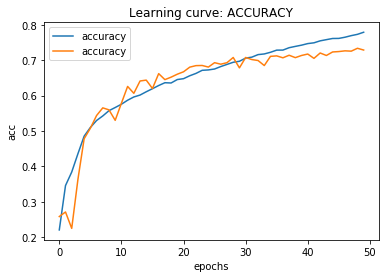

In [9]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='accuracy')

plt.xlabel("epochs")
plt.ylabel("acc")
plt.legend()
plt.title("Learning curve: ACCURACY")

plt.show()

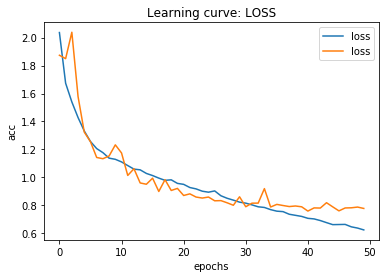

In [10]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='loss')
plt.xlabel("epochs")
plt.ylabel("acc")
plt.legend()
plt.title("Learning curve: LOSS")
plt.show()

# Save Model

In [11]:
model_json = model.to_json()
with open("C:\\MyLearnings\\DeepLearning\\Object Detection\\Projects\\FacialEmotionDetection\\Datasets\\fer2013_images\\fer_images_classes\\Model\\model_json.json", "w") as json_file:
    json_file.write(model_json)
#model.save_model("C:\\MyLearnings\\DeepLearning\\Object Detection\\Projects\\FacialEmotionDetection\\Datasets\\fer2013_images\\fer_images_classes\\Model\\saved_model.h5",save_format='h5')
model.save_weights("C:\\MyLearnings\\DeepLearning\\Object Detection\\Projects\\FacialEmotionDetection\\Datasets\\fer2013_images\\fer_images_classes\\Model\\model.h5")

# Evaluate

In [12]:
scores = model.evaluate(images_val, labels_val, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


accuracy: 72.88%


In [13]:
y_pred = model.predict(images)
print(*np.argmax(y_pred,axis =1))

0 5 0 0 0 0 0 0 0 5 0 0 0 0 0 4 5 0 0 0 0 5 0 4 0 2 0 0 4 0 0 0 3 0 4 4 0 0 0 0 4 0 0 0 0 0 0 0 4 4 0 0 0 0 4 0 0 0 0 5 0 0 0 5 0 4 0 5 0 0 0 5 2 0 0 0 0 0 0 0 0 0 5 5 0 0 5 0 0 0 0 0 0 3 5 5 4 5 0 0 0 0 0 0 5 0 0 0 0 0 5 2 0 0 4 0 0 0 5 0 0 0 0 0 0 0 0 0 4 0 4 5 0 0 0 0 4 0 0 0 5 0 0 0 0 2 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 5 0 5 0 0 0 0 0 4 0 4 0 0 0 0 0 2 0 0 5 0 5 5 0 0 0 0 0 4 0 4 0 0 0 0 5 3 0 0 0 5 0 0 4 5 4 0 5 4 0 5 5 0 0 4 0 0 4 0 0 5 3 0 5 0 0 0 0 0 0 0 0 0 0 0 4 0 0 4 0 2 4 0 0 4 0 0 0 0 5 0 4 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 4 0 3 0 5 2 0 5 0 0 0 5 0 0 4 0 5 0 0 5 0 0 0 4 5 0 0 0 4 0 0 4 4 4 0 0 4 0 0 0 3 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 5 4 0 5 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 2 0 5 0 0 0 0 5 0 0 5 3 0 0 0 0 0 0 0 5 0 0 4 0 0 5 0 0 4 0 4 5 0 0 0 4 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 3 0 5 0 5 0 0 0 2 0 0 0 5 0 0 0 0 0 4 0 0 0 4 5 0 2 0 0 0 0 0 0 2 0 4 5 2 0 0 2 0 0 5 5 0 0 5 5 0 0 4 0 0 0 2 5 0 0 0 4 0 

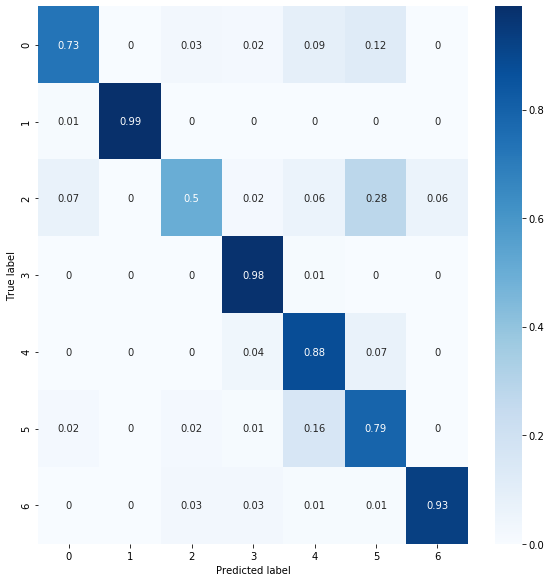

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.73      0.79      4458
           1       1.00      0.99      0.99      7998
           2       0.85      0.50      0.63      4608
           3       0.94      0.98      0.96      8090
           4       0.75      0.88      0.81      5578
           5       0.65      0.79      0.71      5469
           6       0.91      0.93      0.92      3601

    accuracy                           0.86     39802
   macro avg       0.85      0.83      0.83     39802
weighted avg       0.86      0.86      0.85     39802



In [14]:
y_pred_enc = np.argmax(y_pred, axis=1)
labels_pred_enc = np.argmax(labels, axis=1)

con_mat = tf.math.confusion_matrix(labels_pred_enc, y_pred_enc).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
 
con_mat_df = pd.DataFrame(con_mat_norm)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



print('Classification Report')
target_names = ['0', '1','2','3','4','5','6']
print(classification_report(labels_pred_enc, y_pred_enc, target_names=target_names))



In [ ]:
scores = model.evaluate(images, labels, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


In [15]:
y_pred = model.predict(images_val)
print(*np.argmax(y_pred,axis =1))

0 0 0 4 1 0 2 4 0 2 5 0 0 5 0 2 4 2 0 0 0 0 0 3 4 0 5 2 5 5 6 0 0 3 4 0 3 4 0 0 0 3 4 0 4 0 0 0 0 0 0 0 3 0 4 5 6 4 0 0 0 0 4 6 5 2 0 0 5 0 0 5 6 3 5 0 0 0 0 5 0 0 4 0 0 0 0 0 0 4 0 0 4 4 0 0 0 5 0 0 0 0 5 0 0 5 0 5 5 0 2 0 5 0 3 0 5 0 3 0 4 0 5 2 0 4 4 3 4 0 0 0 0 0 4 5 3 3 0 0 5 5 0 0 0 5 0 4 0 4 5 0 0 5 4 3 5 0 4 4 0 0 0 0 0 4 4 0 5 5 0 5 4 0 0 0 0 0 5 0 0 0 0 0 4 0 0 5 0 4 0 0 0 2 5 5 0 5 4 0 5 0 2 0 0 2 0 5 0 3 0 0 0 3 0 2 2 0 4 5 0 0 2 5 0 0 0 5 4 0 5 0 2 0 3 0 4 0 5 0 0 0 5 0 0 5 0 0 3 0 0 0 0 4 3 0 0 4 0 0 2 5 2 0 5 2 3 0 5 0 0 6 0 5 4 0 2 0 0 3 0 0 4 0 5 4 5 5 0 0 5 4 0 5 0 0 0 0 3 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 5 0 0 0 0 4 4 0 0 4 2 0 5 5 4 4 0 0 0 5 6 4 5 5 0 4 2 4 0 0 4 0 3 4 0 0 2 5 0 4 0 0 0 3 0 0 0 0 0 0 4 0 0 0 5 0 0 2 0 0 4 0 0 5 5 0 1 4 5 5 0 0 0 0 0 3 4 0 0 0 6 5 0 0 2 0 0 0 2 5 0 3 1 5 0 3 3 0 4 0 5 0 4 0 0 4 5 0 5 0 2 0 5 5 4 5 0 0 0 0 3 5 2 3 4 0 0 2 0 3 5 0 0 0 0 0 0 0 5 0 5 5 0 5 0 0 0 5 4 5 5 5 2 2 5 0 0 4 0 2 0 3 0 2 0 2 0 5 0 0 4 4 4 0 5 3 0 0 0 5 1 1 1 1 1 

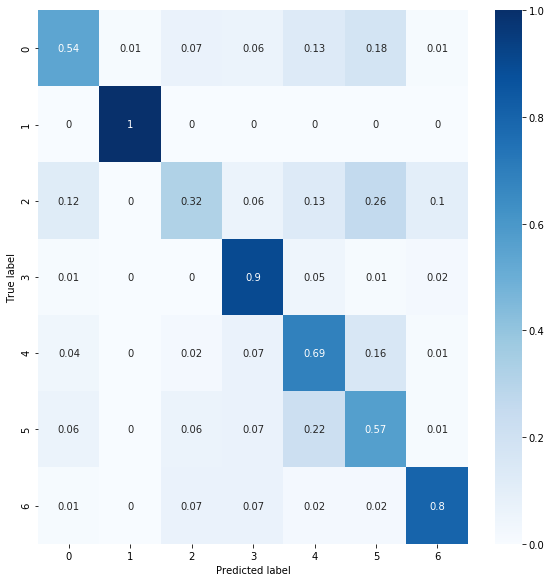

Classification Report
              precision    recall  f1-score   support

           0       0.66      0.54      0.59       495
           1       0.99      1.00      1.00       889
           2       0.59      0.32      0.42       513
           3       0.82      0.90      0.86       899
           4       0.57      0.69      0.62       620
           5       0.50      0.57      0.53       608
           6       0.78      0.80      0.79       401

    accuracy                           0.73      4425
   macro avg       0.70      0.69      0.69      4425
weighted avg       0.73      0.73      0.72      4425



In [17]:
y_pred_enc = np.argmax(y_pred, axis=1)
labels_pred_enc = np.argmax(labels_val, axis=1)

con_mat = tf.math.confusion_matrix(labels_pred_enc, y_pred_enc).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
 
con_mat_df = pd.DataFrame(con_mat_norm)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



print('Classification Report')
target_names = ['0', '1','2','3','4','5','6']
print(classification_report(labels_pred_enc, y_pred_enc, target_names=target_names))

